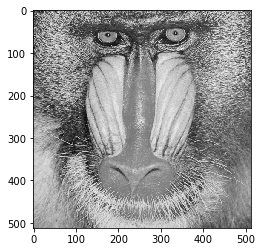

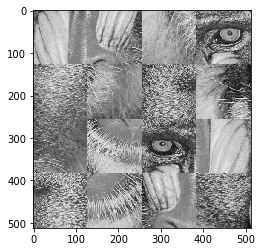

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# open image file and stores it in a numpy array
img = plt.imread('./images/baboon.png')

# show original image
plt.imshow(img, cmap='gray')
plt.show()

# shuffle image blocks
newOrder = [6, 11, 13, 3, 8, 16, 1, 9, 12, 14, 2, 7, 4, 15, 10, 5]
shuffledimg = np.zeros(img.shape)

def get_block(img, block):
  height, length = img.shape
  vinc, hinc = (height / 4, length / 4)
  y = int((hinc * block) // length)
  x = block - (4 * y)
  return (round(y * vinc), round((y + 1) * vinc), round(x * hinc), round((x + 1) * hinc))

for i in range(16):
  sy, syf, sx, sxf = get_block(shuffledimg, i)
  y, yf, x, xf = get_block(img, newOrder[i] - 1)
  shuffledimg[sy:syf,sx:sxf] += img[y:yf,x:xf]


# show shuffled image
plt.imshow(shuffledimg, cmap='gray')
plt.show()

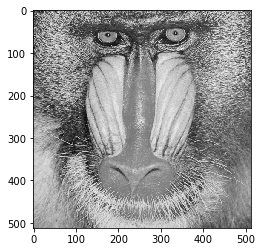

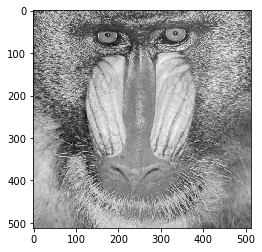

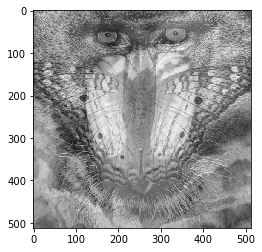

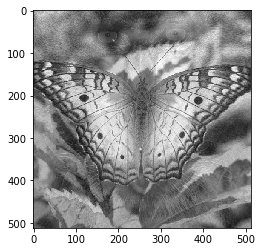

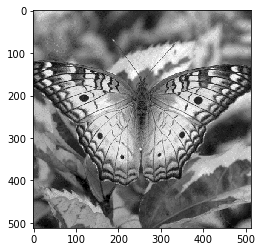

In [31]:
import matplotlib.pyplot as plt
import numpy as np

imga = plt.imread('./images/baboon.png')
imgb = plt.imread('./images/butterfly.png')

comboimga = .8 * imga + .2 * imgb
comboimgb = .5 * imga + .5 * imgb
comboimgc = .2 * imga + .8 * imgb

plt.imshow(imga, cmap='gray')
plt.show()
plt.imshow(comboimga, cmap='gray')
plt.show()
plt.imshow(comboimgb, cmap='gray')
plt.show()
plt.imshow(comboimgc, cmap='gray')
plt.show()
plt.imshow(imgb, cmap='gray')
plt.show()